In [123]:
import re
import string

import pandas as pd
import spacy
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
import matplotlib.pyplot as plt
from nltk import bigrams
from nltk import trigrams


In [118]:
def generate_word_cloud(dic):
    wc = WordCloud(
            background_color='white',
            width=800,
            height=400,
            max_words=200)\
        .generate_from_frequencies(dic)

    plt.figure(figsize=(25, 25))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [5]:
nlp = spacy.load('es_core_news_sm')

In [20]:
institutions = pd.read_excel('data/ELA - Instituciones.xlsx')

In [21]:
institutions = institutions[institutions["categoria"] == "Fuerzas Armadas"]

In [22]:
institutions['fundamento'] = institutions['fundamento'].str.lower()
institutions['fundamento'] = institutions['fundamento'].apply(lambda x: re.sub("[0-9]", '', x))
institutions['fundamento'] = institutions['fundamento'].str.translate(str.maketrans(' ', ' ', string.punctuation))
institutions['fundamento'] = institutions['fundamento'].str.strip()
institutions['fundamento'] = institutions['fundamento'].str.replace('\n',' ')

institutions = institutions[[len(x.split( )) > 2  for x in institutions.fundamento]]
institutions = institutions.reset_index(drop=True)

In [23]:
institutions.head()

,categoria,fundamento
0,Fuerzas Armadas,para mantener orden seguridad y respeto
1,Fuerzas Armadas,que estén sometidas a la justicia civil que se...
2,Fuerzas Armadas,fundamentales para el resguardo de la soberaní...
3,Fuerzas Armadas,creemos que son necesarias para la defensa de ...
4,Fuerzas Armadas,redefinir el rol de las fuerzas armadas como u...


In [30]:
words = []
for x in word_tokenize(' '.join(institutions['fundamento'].to_list())):
    if x not in stopwords.words('spanish'):
        words.append(x)

#len(words)
#words

31599

In [31]:
word_count_map = {}
for i in words:
    word_count_map[i] = words.count(i)
#word_count_map

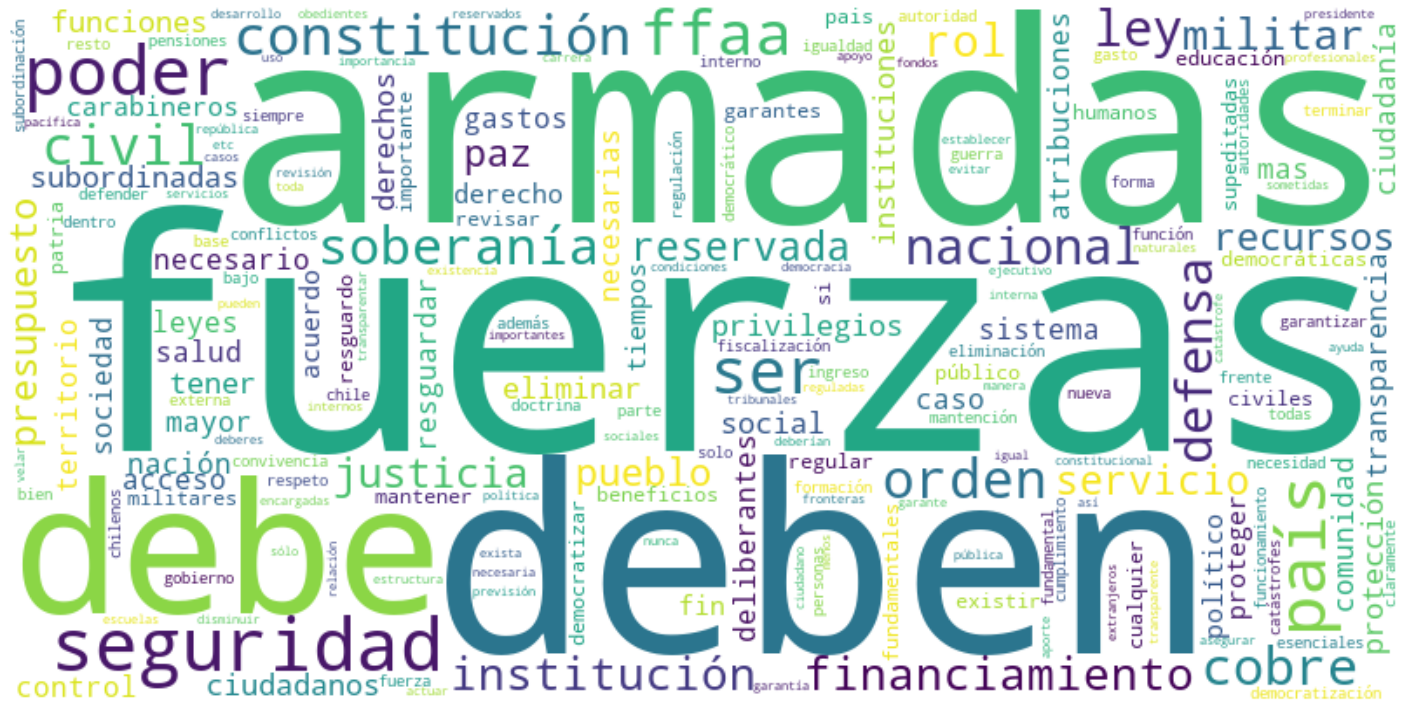

In [119]:
generate_word_cloud(word_count_map)

In [103]:
l = []
for chunk in institutions['fundamento']:
    for x in bigrams(word_tokenize(chunk)):
        l.append(x)
#l

In [114]:
word_count_bigram_map = {}
for i, j in l:
    if not (i in stopwords.words('spanish') and j in stopwords.words('spanish')):
        word_count_bigram_map[i + " " +j] = l.count((i, j))
#word_count_bigram_map

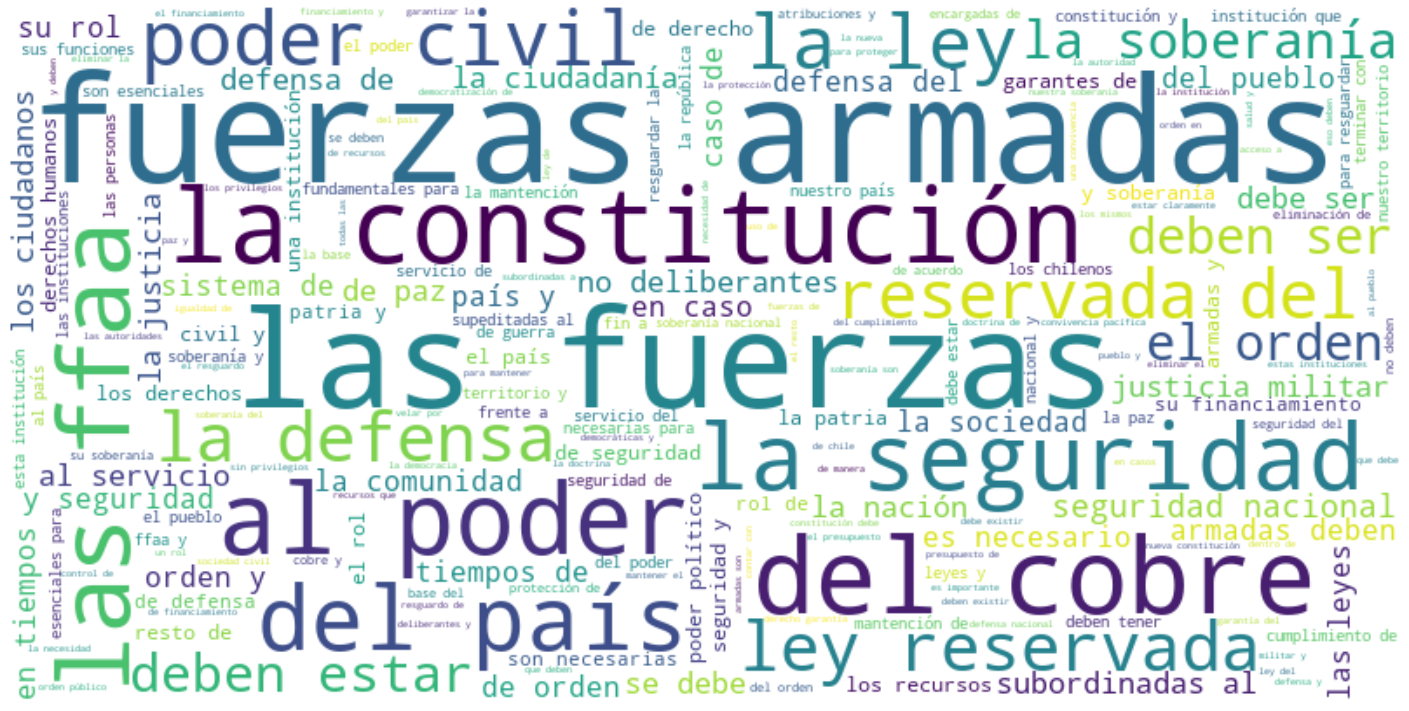

In [120]:
generate_word_cloud(word_count_bigram_map)

In [124]:
#NO BORRAR
l = []
for chunk in institutions['fundamento']:
    for x in trigrams(word_tokenize(chunk)):
        l.append(x)
#l

In [139]:
word_count_trigram_map = {}
for i, j, k in l:
    print(i.pos_)


    '''
    if not (i in stopwords.words('spanish') and j in stopwords.words('spanish')) and \
        not (i in stopwords.words('spanish') and k in stopwords.words('spanish')):
        word_count_trigram_map[i + " " +j + " " + k] = l.count((i, j, k))
    '''
#word_count_trigram_map

AttributeError: 'str' object has no attribute 'pos_'

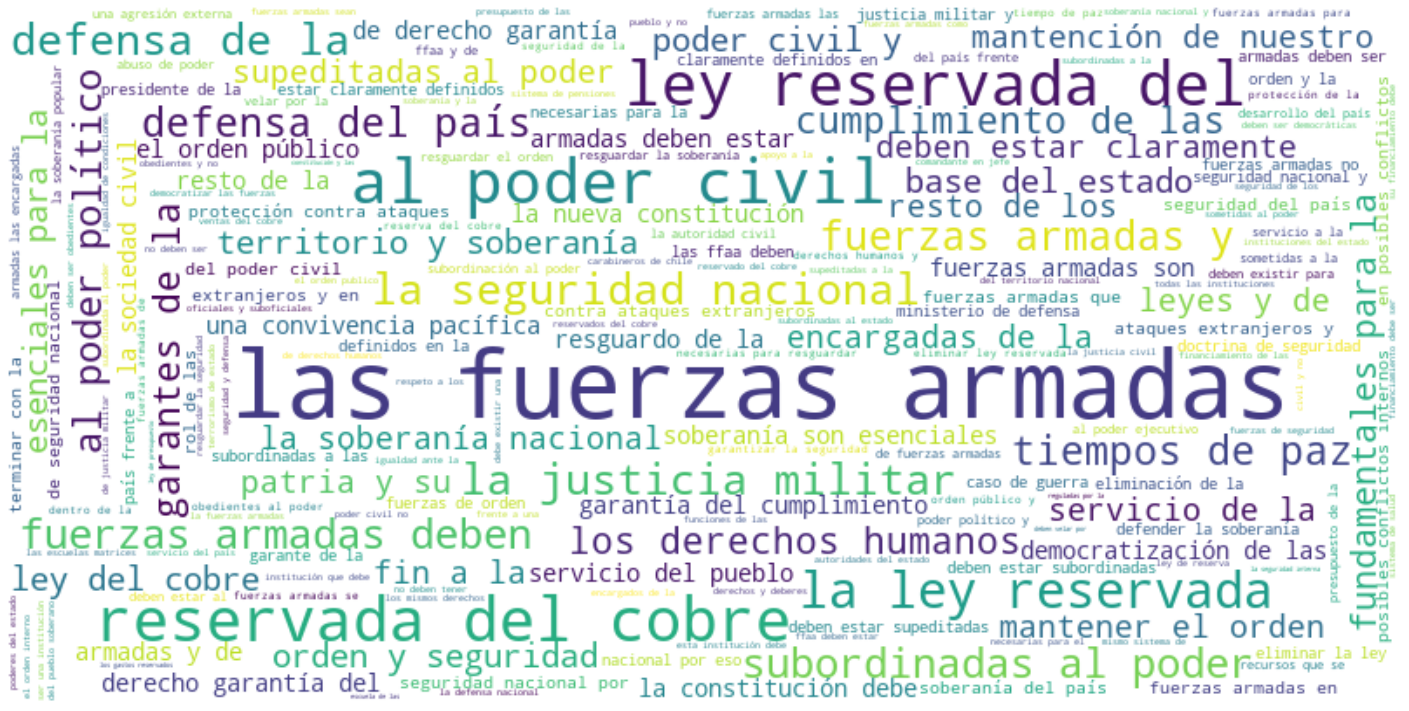

In [138]:
generate_word_cloud(word_count_trigram_map)